In [11]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [12]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape


(60000, 28, 28)

In [13]:
X_test.shape


(10000, 28, 28)

In [14]:
single_image= X_train[0]
single_image.shape


(28, 28)

(60000,)

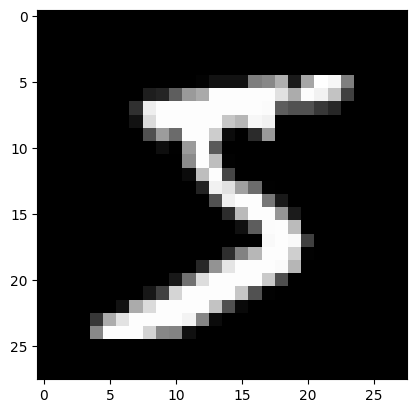

In [15]:
plt.imshow(single_image,cmap='gray')
y_train.shape


In [18]:
X_train.min()

0

In [19]:
X_train.max()

255

In [20]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [21]:
X_train_scaled.min()


0.0

In [22]:
X_train_scaled.max()


1.0

In [23]:
y_train[0]


5

In [24]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)


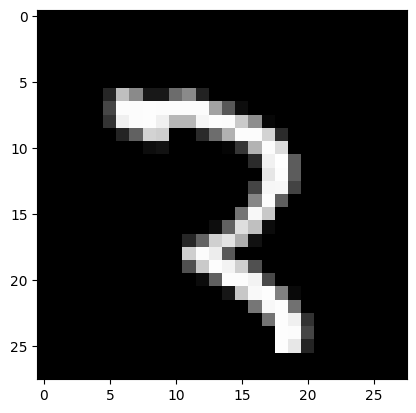

In [25]:
type(y_train_onehot)
y_train_onehot.shape
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')


In [26]:
y_train_onehot[500]
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)


In [27]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu'))
model.add(layers.AvgPool2D (pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='tanh'))
model.add(layers.Dense(10, activation ='softmax'))


In [28]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 27s 28ms/step - loss: 0.2563 - accuracy: 0.9326 - val_loss: 0.1024 - val_accuracy: 0.9709
Epoch 2/5
938/938 [==============================] - 24s 25ms/step - loss: 0.0827 - accuracy: 0.9775 - val_loss: 0.0651 - val_accuracy: 0.9808
Epoch 3/5
938/938 [==============================] - 21s 23ms/step - loss: 0.0566 - accuracy: 0.9842 - val_loss: 0.0537 - val_accuracy: 0.9841
Epoch 4/5
938/938 [==============================] - 23s 25ms/step - loss: 0.0426 - accuracy: 0.9882 - val_loss: 0.0559 - val_accuracy: 0.9820
Epoch 5/5
938/938 [==============================] - 22s 24ms/step - loss: 0.0339 - accuracy: 0.9906 - val_loss: 0.0507 - val_accuracy: 0.9844


<Axes: >

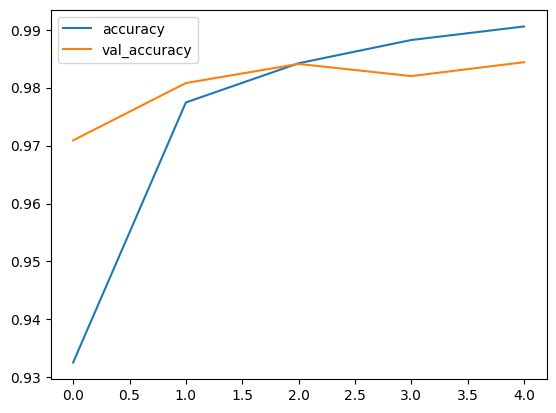

In [29]:
metrics = pd.DataFrame(model.history.history)
metrics.head()
metrics[['accuracy','val_accuracy']].plot()

Sarankumar J
212221230087


<Axes: >

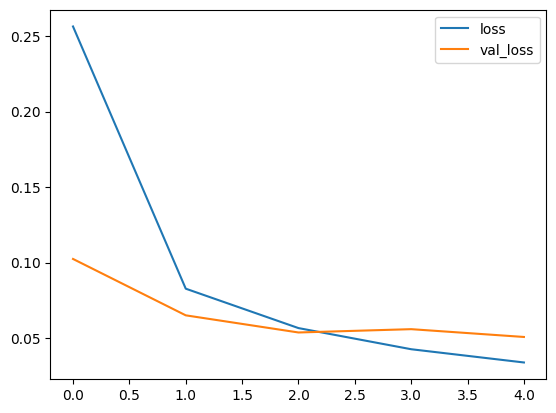

In [31]:
print("Sarankumar J")
print("212221230087")
metrics[['loss','val_loss']].plot()


In [32]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 8ms/step


In [33]:
print("Sarankumar J")
print("212221230087")
print(confusion_matrix(y_test,x_test_predictions))

Sarankumar J
212221230087
[[ 972    1    1    0    2    1    2    1    0    0]
 [   0 1128    4    0    0    1    2    0    0    0]
 [   1    3 1020    1    1    0    0    4    2    0]
 [   0    0    1 1003    0    2    0    1    3    0]
 [   0    0    0    0  970    0    4    0    0    8]
 [   1    0    1    9    0  879    1    0    1    0]
 [   4    2    1    0    3    2  946    0    0    0]
 [   1    3   10    4    0    0    0 1008    1    1]
 [   5    0    5    3    1    3    3    4  947    3]
 [   2    5    0    7    7    3    0    8    6  971]]


In [34]:
print("Sarankumar J")
print("212221230087")
print(classification_report(y_test,x_test_predictions))

Sarankumar J
212221230087
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [40]:
img = image.load_img('img.jpg')
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [41]:
img = image.load_img('img.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)
print(x_single_prediction)

1/1 [==============================] - 0s 40ms/step
[5]


Sarankumar J
212221230087


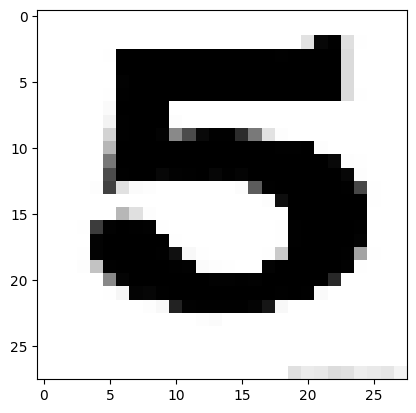

In [42]:
print("Sarankumar J")
print("212221230087")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')


In [43]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [44]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)


1/1 [==============================] - 0s 23ms/step


In [45]:
print("Sarankumar J")
print("212221230087")
print(x_single_prediction)

Sarankumar J
212221230087
[5]
